In [24]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from dynamic_pricing.ml.release.model.draw.draw import Artist, SelloutReport
from dynamic_pricing.ml.release.model.pipeline import PipeLine
from dynamic_pricing.ml.release.model.preprocess.create_holders import OffersHolder

from dynamic_pricing.ml.release import hyper_parameters

In [26]:
def debug():
    hp_instance = hyper_parameters.init_hyper_parameters()

    pipeline = PipeLine()

    holder, recommended_prices_demand, recommended_prices_sellout = pipeline.run_pipeline(hp_instance)

    holder: 'OffersHolder'

    return holder, recommended_prices_demand, recommended_prices_sellout


holder, recommended_prices_demand, recommended_prices_sellout = debug()

enter: run_pipeline
enter: _pipeline_load_and_preprocess
enter: collect_datasets: simulated
enter: get_dataset: simulated
enter: preprocess_dataset: simulated
len(offer_ids) 10
unique_product_ids: 10
enter: add_features: simulated
enter: get_meta: simulated folder: min_max_prices
enter: get_meta: simulated folder: pure_costs
enter: get_meta: simulated folder: stocks
enter: get_meta: simulated folder: volume
enter: get_meta: simulated folder: volume_costs
enter: add_features: simulated
enter: get_meta: simulated folder: min_max_prices
enter: get_meta: simulated folder: pure_costs
enter: get_meta: simulated folder: stocks
enter: get_meta: simulated folder: volume
enter: get_meta: simulated folder: volume_costs
enter: add_features: simulated
enter: get_meta: simulated folder: min_max_prices
enter: get_meta: simulated folder: pure_costs
enter: get_meta: simulated folder: stocks
enter: get_meta: simulated folder: volume
enter: get_meta: simulated folder: volume_costs
enter: add_features: si

In [27]:
artist = Artist(holder)
report = SelloutReport(holder)

In [28]:
metrics_by_day = ['capital_by_day', 'storage_costs_by_day', 'demand_by_day', 'profit_by_day']

metrics_by_period = ['period_capital', 'period_demand', 'period_storage_costs', 'period_profit']

In [29]:
base_path = "/Users/dev.daniil.bakushkin/Desktop/suppi/backend/dynamic_pricing/ml/release/model/draw/report"
import os

os.makedirs(base_path, exist_ok=True)

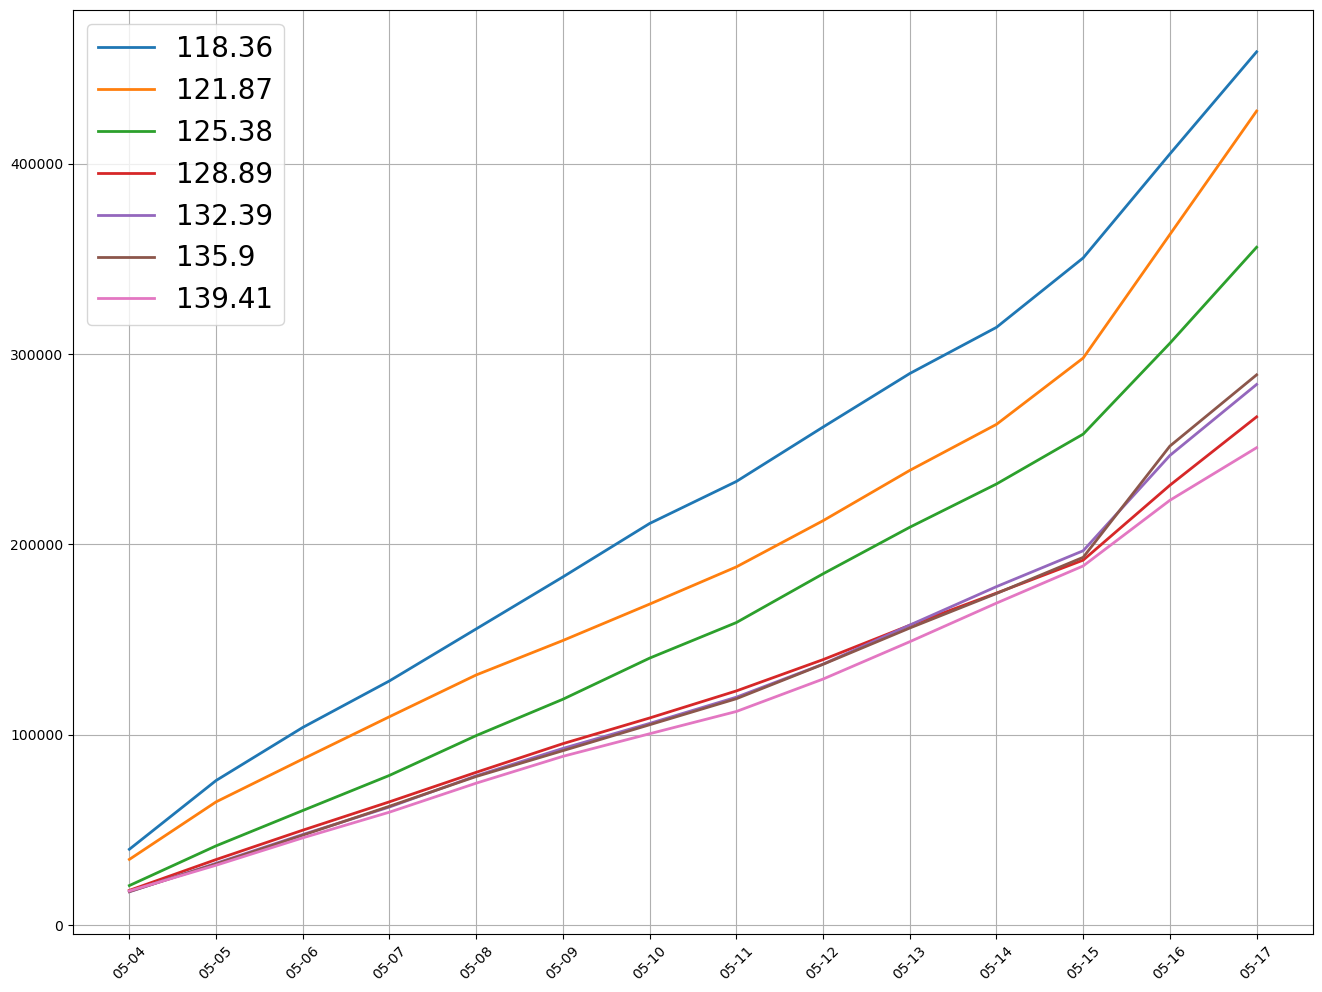

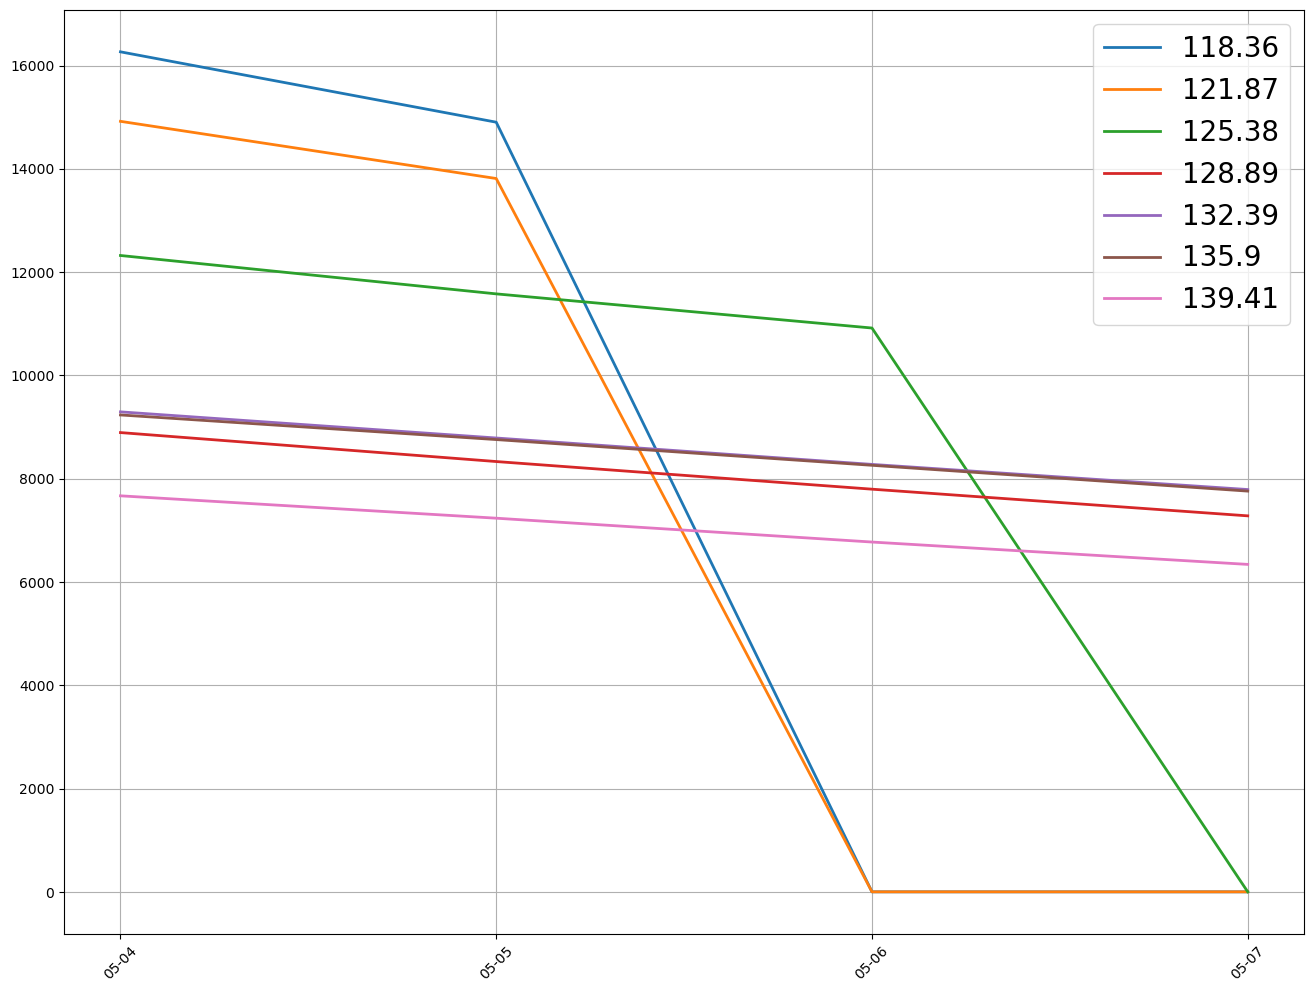

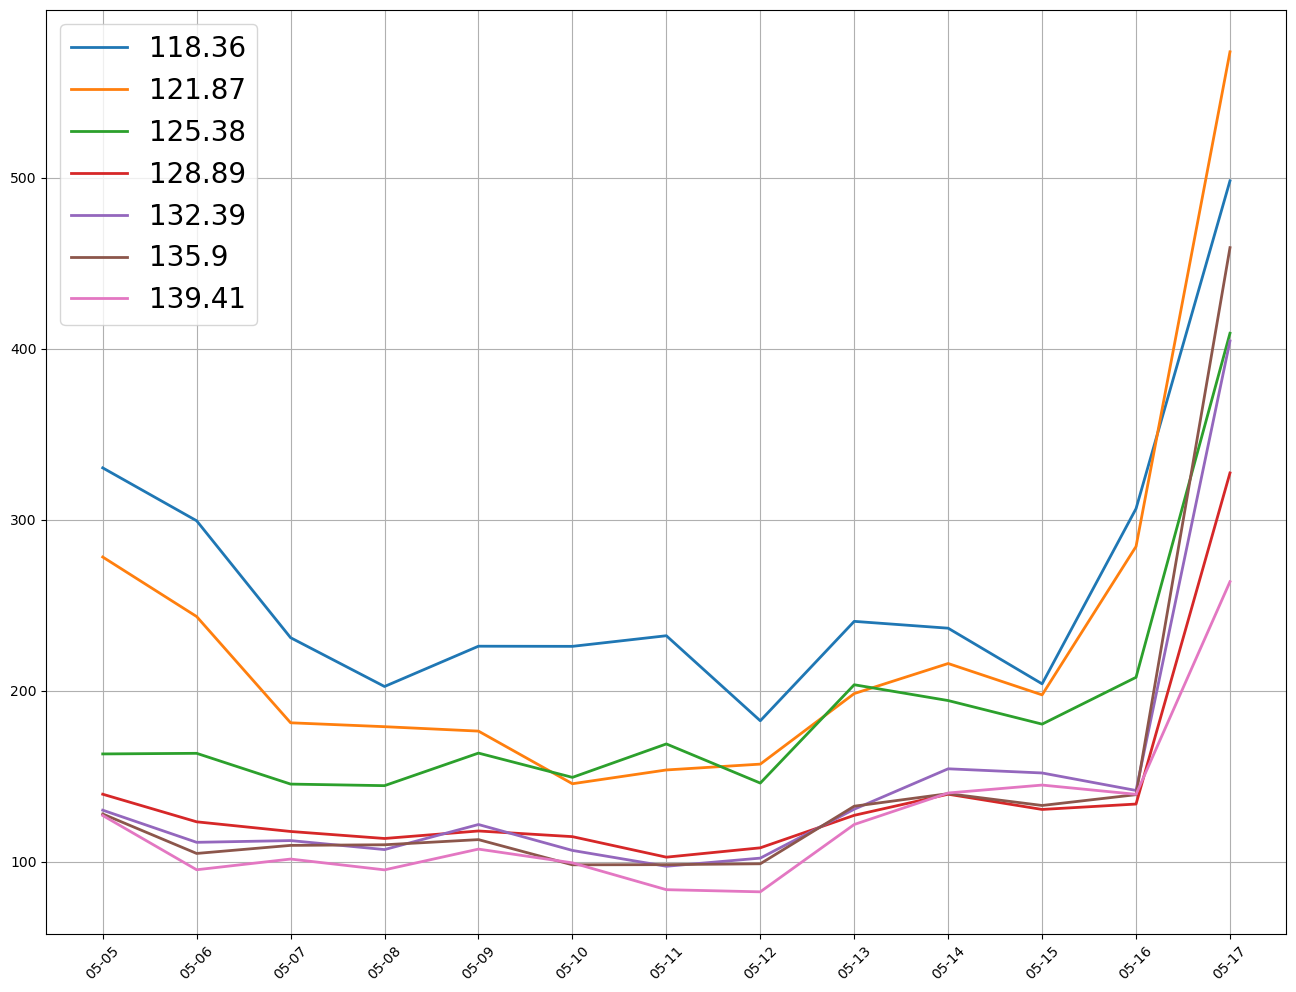

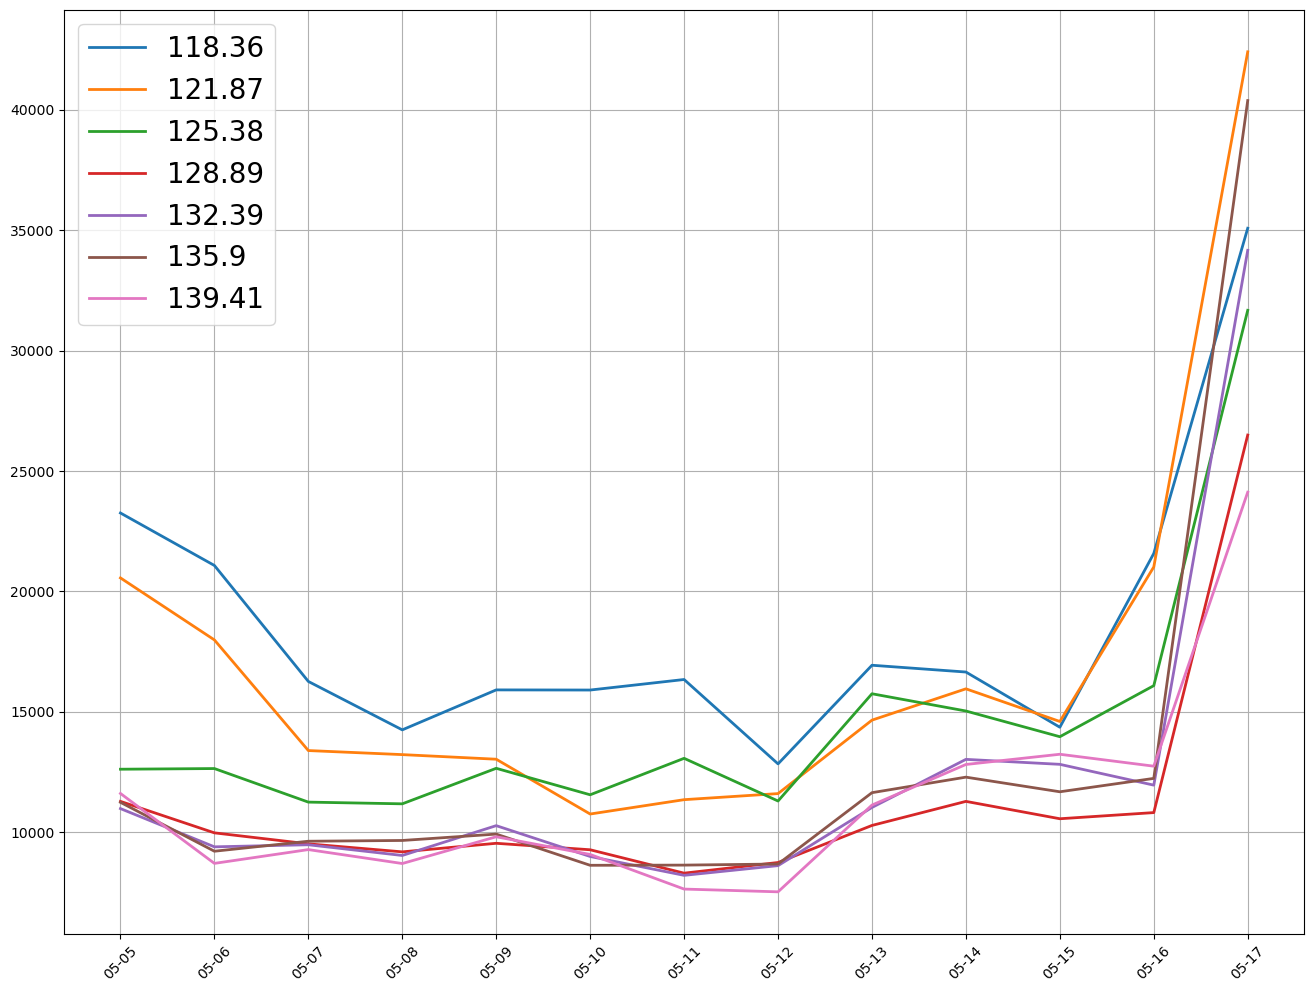

In [30]:
# Your paths
csv_base_path = '/Users/dev.daniil.bakushkin/Desktop/suppi/backend/dynamic_pricing/ml/release/model/draw/report/csv'
image_base_path = '/Users/dev.daniil.bakushkin/Desktop/suppi/backend/dynamic_pricing/ml/release/model/draw/report/images'

# Loop over product IDs
for product_id in holder.hp.shops.product_ids[:1]:
    # Create directories for CSV and images
    csv_product_path = os.path.join(csv_base_path, str(product_id))
    os.makedirs(csv_product_path, exist_ok=True)

    image_product_path = os.path.join(image_base_path, str(product_id))
    os.makedirs(image_product_path, exist_ok=True)

    # Save metrics data to CSV
    for metric in metrics_by_period:
        report.save_metric_to_csv(product_id, metric, csv_product_path)

    for metric in metrics_by_day:
        report.save_graph_as_image(product_id, metric, image_product_path)
    # Save stocks graph as an image

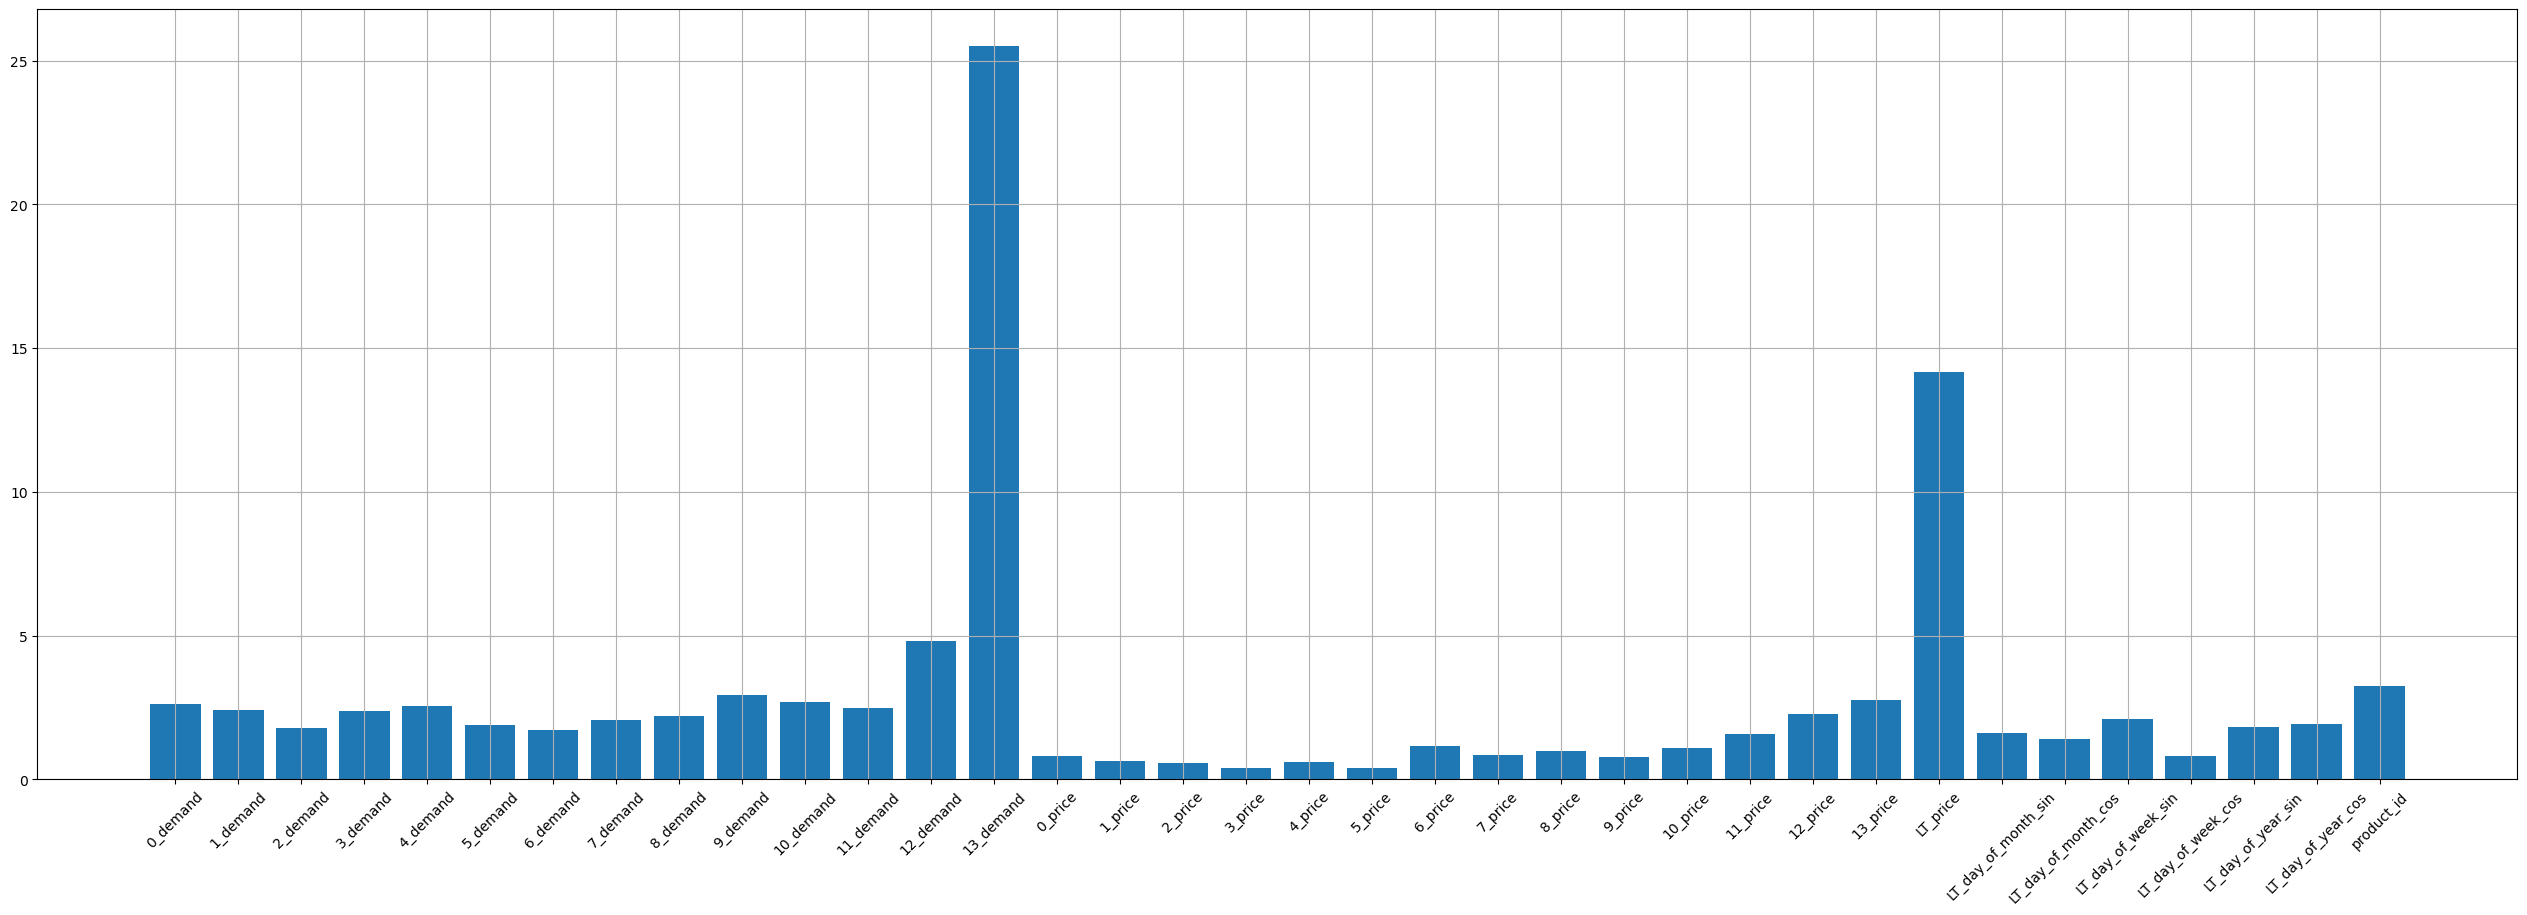

In [31]:
artist.draw_feature_importances()

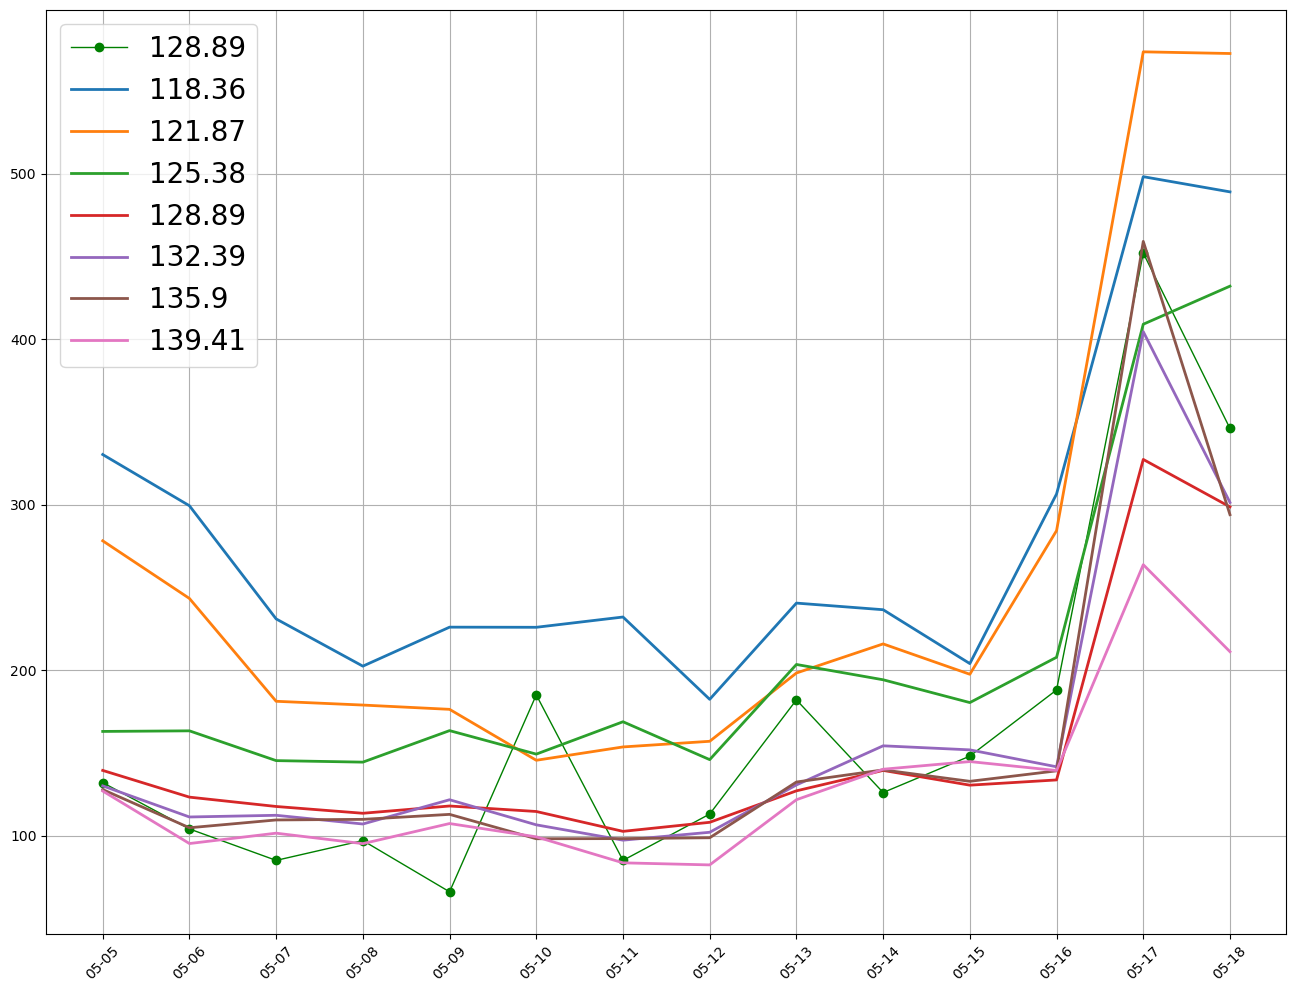

In [32]:
for product_id in holder.hp.shops.product_ids[:1]:
    artist.draw_predictions(product_id)